In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras import models, layers, optimizers
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras import models,layers
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


txt_file_path = 'datasets/WBC.txt'
dataframe1 = pd.read_csv(txt_file_path)
dataframe1.to_csv('datasets/WBC.csv',index = None)


df = pd.read_csv("datasets/WBC.csv")
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric)
df.fillna(df.mean(), inplace=True)



In [22]:
df

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10.0,3,2,1,2
1,1015425,3,1,1,1,2,2.0,3,1,1,2
2,1016277,6,8,8,1,3,4.0,3,7,1,2
3,1017023,4,1,1,3,2,1.0,3,1,1,2
4,1017122,8,10,10,8,7,10.0,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2.0,1,1,1,2
694,841769,2,1,1,1,2,1.0,1,1,1,2
695,888820,5,10,10,3,7,3.0,8,10,2,4
696,897471,4,8,6,4,3,4.0,10,6,1,4


In [23]:
X = df.iloc[:, :-1].values  # All columns except the last one
y = df.iloc[:, -1].values  # The last column as the target
y = (y == 4).astype(int)  # Convert to 0 and 1 (binary classification)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Dense(units=16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)  # Set verbose to 1 if you want to see progress

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f'Test accuracy: {test_acc:.2f}, Test loss: {test_loss:.2f}')

c:\Users\abhay\OneDrive\Desktop\AT\MS(R)\CNN\.conda\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test accuracy: 0.97, Test loss: 0.09


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Confusion Matrix:
[[128   5]
 [  2  75]]
Accuracy: 0.97


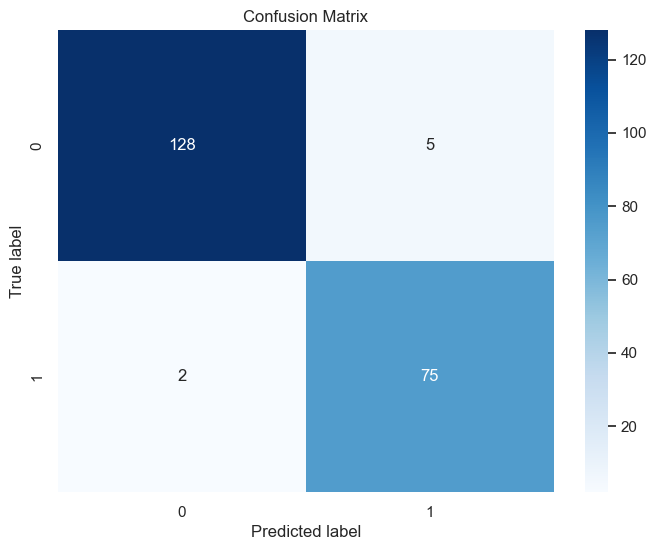

In [24]:
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_class)

# Print results
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the confusion matrix using Seaborn
sns.set()  # Use seaborn's default style for the plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()